# Examen Práctica 1.
## Pablo Olivares Martínez

In [268]:
%reload_ext version_information
%version_information numpy, matplotlib, sympy

Software versions
Python 3.10.3 64bit [GCC 11.2.1 20220127 (Red Hat 11.2.1-9)]
IPython 8.1.1
OS Linux 5.16.18 200.fc35.x86_64 x86_64 with glibc2.34
numpy 1.21.5
matplotlib 3.5.1
sympy 1.10
Mon Apr 04 18:19:16 2022 CEST

In [269]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
from numpy import sign
from decimal import *
from scipy.optimize import fsolve
from sympy.solvers import solve, nsolve, solveset

In [270]:
x = sp.Symbol('x')
mporig = getcontext().prec
roundorig = getcontext().rounding
getcontext().rounding = ROUND_HALF_UP

## Ejercicio

In [271]:
DNI = [1,2,3,4,5,6,7,8]
DNIdec = [Decimal(i) for i in DNI]
S = float(sum(DNI))
M = S / len(DNI)

Sdec = sum(DNIdec)
Mdec = Sdec / len(DNIdec)

def f(x):
    return x**3+M*x+S


### Apartado 1: Función de punto fijo $g(x)=x-f(x)$ y su representación gráfica.

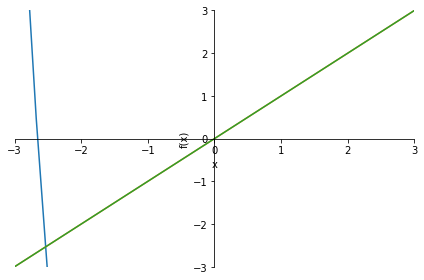

In [272]:
def g(x):
    return x - f(x)

sp.plot(g(x),x,x, xlim = (-3,3), ylim = (-3,3))

### Apartado 2: Gráfica de solución acotada en intervalo de longitud 1.

Se llegó al número máximo de iteraciones -2.5396839711824779
Número de iteraciones reales en metodoBiseccion:  100
-2.5396839711824779


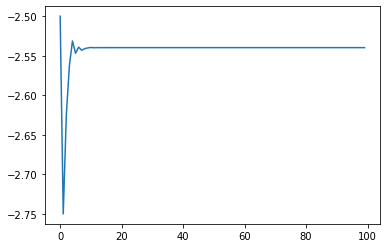

In [273]:
def fnum(x):
    return x**3+Mdec*x+Sdec

def metodoBiseccion(f,a,b,cifras=16,prec=10**(-16),nmax=100,num_iter=False):
    getcontext().prec = cifras+1
    tol = 10**(-cifras)
    niter = 0; sale =''
    sucesionBiseccion = []
    a,b = Decimal(a),Decimal(b)

    for k in range(nmax):
        niter = niter + 1;
        c = a+(b-a)/2 # equivalente a c = (a+b)/2
        sucesionBiseccion.append(c)

        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c

        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif niter < nmax:
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones',c)
    if num_iter:
        print('Número de iteraciones reales en metodoBiseccion: ',niter)

    getcontext().prec = mporig
    return sucesionBiseccion

a,b = -3,-2
biseccion = metodoBiseccion(fnum,a,b,num_iter=True)
print(biseccion[len(biseccion)-1])
num_items = [i for i in range(len(biseccion))]
plt.plot(num_items,biseccion)

### Apartado 3: $tol = 10^{-1}$

In [274]:
def numIterBiseccion(a,b,cifras):
    tol = 10**(-cifras)
    n = np.ceil(np.log((b-a)/tol)/np.log(2) - 1)
    print('Número máximo de iteraciones: ', n)
    return n

cifras = 1
#Este es el máximo número de iteraciones que haremos para obtener la aproximación
numIterBiseccion(a,b,cifras)
solBiseccion = metodoBiseccion(fnum,a,b,cifras,num_iter=True)


Número máximo de iteraciones:  3.0
Posiblemente solución exacta:  -2.5
Número de iteraciones reales en metodoBiseccion:  1


### Apartado 4: 10 iteraciones en Newton-Raphson con $x_0=-2,5$

In [275]:
def newtonRaphson(f,df,x0,cifras=16,prec=10**(-16),nmax=100,num_iter=False):
    getcontext().prec = cifras
    tol = 10**(-cifras)
    niter = 0; sale = ''
    sucesionNewtonRaphson = []
    x0 = Decimal(x0)

    for k in range(nmax):
        niter = niter + 1
        x1 = x0 - f(x0)/Decimal(df(x0))
        sucesionNewtonRaphson.append(x1)

        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ',x1)
    else:
        print('Se llegó al número máximo de iteraciones: ',x1)
    if num_iter:
        print('Número de iteraciones reales en newtonRaphson: ',niter)
        
    return sucesionNewtonRaphson

#Definimos df
def df(x):
    return 3*x**2+Mdec

x0 = solBiseccion[0]
solNR = newtonRaphson(fnum,df,x0,cifras=16)


Posiblemente solución exacta:  -2.539683971182478


### Apartado 5: Comparación resultados

In [276]:
print('Solución real obtenida con solve: ', sp.solve(f(x),x)[0])
print('Solución real obtenida con el método de la bisección: ', biseccion[len(biseccion)-1], '// ERROR: ', abs(biseccion[len(biseccion)-1]-sp.solve(f(x),x)[0]))
print('Solución real obtenida con el método de la bisección con tol = 10^(-1): ', x0, '// ERROR: ', abs(x0-sp.solve(f(x),x)[0]))
print('Solución real obtenida con el método de Newton-Raphson: ', solNR[len(solNR)-1], '// ERROR: ',abs(solNR[len(solNR)-1]-sp.solve(f(x),x)[0]))

Solución real obtenida con solve:  -2.53968397118248
Solución real obtenida con el método de la bisección:  -2.5396839711824779 // ERROR:  0
Solución real obtenida con el método de la bisección con tol = 10^(-1):  -2.5 // ERROR:  0.0396839711824777
Solución real obtenida con el método de Newton-Raphson:  -2.539683971182478 // ERROR:  4.44089209850063e-16


Como podemos ver, el resultado que mejor se acerca a la solución exacta es la de Newton-Raphson, la cual vemos que coincide en todos los dígitos en común con la solución ofrecida por solve(). Esto se debe a su velocidad de convergencia cuadrática para soluciones de raíz simple.